# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [ ]:
# Add Matplotlib inline magic command
# %matplotlib inline
# %matplotlib notebook 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
#view city_data
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


### Merge the DataFrames

In [3]:
#check data
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [4]:
#exploring data
city_data_df['type'].value_counts()



Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [5]:
city_data_df['driver_count'].value_counts()

7     8
1     7
4     7
23    6
25    5
22    5
20    5
19    4
11    4
2     4
5     3
6     3
10    3
12    3
39    3
38    2
57    2
44    2
45    2
46    2
59    2
64    2
67    2
37    2
33    2
3     2
21    2
17    2
32    1
52    1
72    1
70    1
69    1
65    1
8     1
61    1
9     1
58    1
14    1
49    1
50    1
28    1
48    1
47    1
16    1
18    1
41    1
26    1
27    1
36    1
34    1
73    1
Name: driver_count, dtype: int64

<AxesSubplot:>

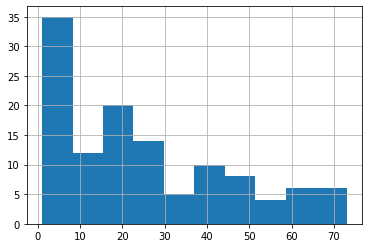

In [6]:
city_data_df['driver_count'].hist()

In [7]:
#view ride_data
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12


In [8]:
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   float64
dtypes: float64(2), object(2)
memory usage: 74.3+ KB


<AxesSubplot:>

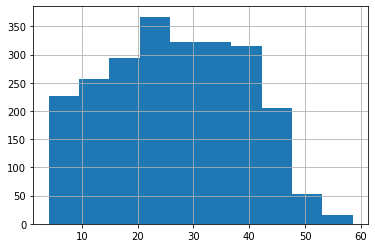

In [9]:
ride_data_df['fare'].hist()

In [10]:
ride_data_df.describe()

,fare,ride_id
count,2375.000000,2.375000e+03
mean,26.753112,4.887270e+12
std,12.109465,2.907361e+12
min,4.050000,3.218337e+08
25%,17.190000,2.381175e+12
50%,26.600000,4.748540e+12
75%,36.645000,7.461935e+12
max,58.550000,9.991540e+12


In [11]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [12]:
#  1. Get the total rides for each city type
# use groupby to create a series od ata with city type as index w/ ride_id as a count
total_rides_by_type = pyber_data_df.groupby(["type"]).count()['ride_id']
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [13]:
# 2. Get the total drivers for each city type
# create a data series by city type as index with gorupby(), with sum() to aggregate driver_count column
total_drivers_by_type = city_data_df.groupby(["type"]).sum()['driver_count']
total_drivers_by_type 



type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [14]:
#  3. Get the total amount of fares for each city type
# create a series by type and apply sum to aggregate fare column
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()['fare']
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [18]:
#  4. Get the average fare per ride for each city type. 
# average_fare_by_type = total_fares_by_type / total_rides_by_type
avg_fare_by_type = total_fares_by_type / total_rides_by_type
avg_fare_by_type


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [20]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fare_by_type / total_drivers_by_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [34]:
#  6. Create a PyBer summary DataFrame. 
pyber_ride_summary_df = pd.DataFrame({
    "Total Rides": total_rides_by_type,
    "Total Drivers": total_drivers_by_type,
    "Total Fares": total_fares_by_type,
    "Average Fare per Ride": avg_fare_by_type,
    "Average Fare per Driver": avg_fare_per_driver
    
})
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [35]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_ride_summary_df.index.name = None
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [36]:
#  8. Format the columns.
pyber_ride_summary_df['Total Rides'] = pyber_ride_summary_df['Total Rides'].map("{:,}".format)
pyber_ride_summary_df['Total Drivers'] = pyber_ride_summary_df['Total Drivers'].map("{:,}".format)
pyber_ride_summary_df['Total Fares'] = pyber_ride_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_ride_summary_df['Average Fare per Ride'] = pyber_ride_summary_df['Average Fare per Ride'].map("${:.2f}".format)
pyber_ride_summary_df['Average Fare per Driver'] = pyber_ride_summary_df['Average Fare per Driver'].map("${:.2f}".format)
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [ ]:
# 1. Read the merged DataFrame


In [ ]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.


In [ ]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()


In [ ]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 


In [ ]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.



In [ ]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

In [ ]:
# 7. Check that the datatype for the index is datetime using df.info()


In [ ]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.


In [ ]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

